In [1]:
import imdlib as imd
import os
from datetime import datetime
import rioxarray

In [2]:
start_yr = 2000
end_yr = 2022

In [3]:
variable = 'tmin' # other options are ('rain'/'tmin'/ 'tmax')

In [194]:
file_dir = (r'E:\Akarsh\DATA\IMD data\IMD_tmin\\')  # Path to save the files
imd.get_data(variable, start_yr, end_yr, fn_format='yearwise', file_dir=file_dir)

In [4]:
file_dir = (r'E:\Akarsh\DATA\IMD data\IMD_tmin\\')  # Path to save the files
data = imd.open_data(variable, start_yr, end_yr, 'yearwise', file_dir)
data

In [197]:
ds = data.get_xarray()

In [198]:
# Set values greater than or equal to 99 to NaN
ds = ds.where(ds < 99, other=float('nan'))

In [199]:
print(ds)

<xarray.Dataset>
Dimensions:  (time: 8401, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2022-12-31
Data variables:
    rain     (time, lat, lon) float64 -999.0 -999.0 -999.0 ... -999.0 -999.0
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2023-11-17 10:11:53.481735 Python
    references:   
    comment:      
    crs:          epsg:4326


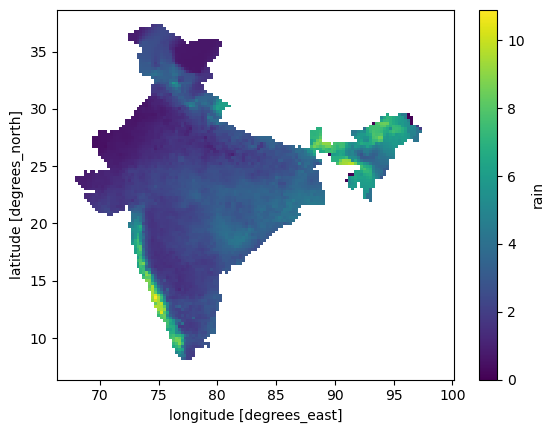

In [200]:
ds = ds.where(ds['tmin'] != -999.) #Remove NaN values
ds['tmin'].mean('time').plot()

In [201]:
# Create a directory to store daily files
daily_dir = os.path.join(file_dir, 'IMDTmin_daily_files')
os.makedirs(daily_dir, exist_ok=True)

In [202]:
# Save data as daily files
for timestamp in ds['time']:
    date_str = timestamp.values.astype('datetime64[D]').astype(datetime).strftime('%Y-%m-%d')
    filename = f"IMDTmin_{date_str}.tif"
    filepath = os.path.join(daily_dir, filename)
    data_subset = ds.sel(time=timestamp)
    data_subset.to_netcdf(filepath)

print("Daily files saved successfully.")

Daily files saved successfully.


In [180]:
selected_year = 2022

# Create a directory to store 8-day sum files
sum_dir = os.path.join(file_dir, 'IMD8day_Mean_Tmin')
os.makedirs(sum_dir, exist_ok=True)

# Create a directory to store monthly sum files
monthly_dir = os.path.join(file_dir, 'IMD_monthly_Tmin')
os.makedirs(monthly_dir, exist_ok=True)

# Calculate and save 8-day mean for the selected year
year_data = ds.sel(time=slice(f'{selected_year}-01-01', f'{selected_year}-12-31'))
# select mean for Tmax and Tmin,sum for Rain and choose time interval in no of days
eightday_mean = year_data.resample(time='8D').mean(skipna=True)

# Save 8-day mean with naming convention "IMDRain/Tmax/Tmin_<yyyy-mm-dd>.tif"
for timestamp in eightday_mean['time']:
    eightday_str = timestamp.values.astype('datetime64[D]').astype(datetime).strftime('%Y-%m-%d')
    filename = f"IMDTmin_{eightday_str}.tif"
    filepath = os.path.join(sum_dir, filename)
    eightday_subset = eightday_mean.sel(time=timestamp)
    eightday_subset.to_netcdf(filepath)

print(f"8-day mean files for {selected_year} saved successfully.")

# Calculate and save monthly mean for the selected year
year_data = ds.sel(time=slice(f'{selected_year}-01-01', f'{selected_year}-12-31'))
# select mean for Tmax and Tmin and sum for Rain
monthly_mean = year_data.resample(time='1M').mean(skipna=True)

# Save monthly mean with naming convention "IMD_Rain_<mmm>"
for timestamp in monthly_mean['time']:
    month_str = timestamp.values.astype('datetime64[M]').astype(datetime).strftime('%b')
    filename = f"IMDTmin_{selected_year}_{month_str}.tif"
    filepath = os.path.join(monthly_dir, filename)
    monthly_subset = monthly_mean.sel(time=timestamp)
    monthly_subset.to_netcdf(filepath)

print(f"Monthly mean files for {selected_year} saved successfully.")

8-day mean files for 2022 saved successfully.
Monthly mean files for 2022 saved successfully.
